In [6]:
import matplotlib.pyplot as plt
import numpy as np # useful for calculations
import h5py #required to read hdf5 files
import pickle

plt.style.use(['dark_background'])
plt.rcParams.update({
    'figure.figsize': (9, 6),
    'agg.path.chunksize': 2000,
    'xtick.direction': 'in',
    'xtick.major.size': 6,
    'xtick.major.width': 1,
    'ytick.direction': 'in',
    'ytick.major.size': 6,
    'ytick.major.width': 1,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.top': True,
    'ytick.right': True,
})


FloatType = np.float64  # double precision: np.float64, for single use np.float32

def read_gadget_snapshot(file_name):
	data = h5py.File(file_name, 'r')  # load full hdf5 file
	time = FloatType(data['Header'].attrs['Time']) # the scale factor at which snapshot was written
	BoxSize = FloatType(data['Header'].attrs['BoxSize']) # box size in code units (Mpc)
	Pos = np.array(data['PartType1']['Coordinates'], dtype=FloatType) #3d Positions of all particles, e.g. x coord: Pos[:,0]
	mass = FloatType(data['Header'].attrs['MassTable'][1]) # mass of one DM particle
	n_particles = Pos.size // 3
	return time, Pos, mass, n_particles, BoxSize

file_name = "snapshot_002.hdf5"
time, Pos, mass, n_particles, BoxSize = read_gadget_snapshot(file_name)

with open('halos.pkl', 'rb') as file:
    halos = pickle.load(file)

halo3 = halos[2]
n_halo3 = len(halo3)

Pos3 = Pos[halo3]
x3=Pos3[:, 0]
y3=Pos3[:, 1]
z3=Pos3[:, 2]

In [7]:
H0 = 67.8 # km  s^-1  Mpc^-1
G =  4.301e-9 # km^2 Mpc s^-2  Msun^-1

# critical density of the universe today (using H0 from the Gadget4 simulation)
rho_crit = 3*H0**2/(8*np.pi*G) # Msun Mpc^-3

def get_R200(M200, rho_crit=rho_crit):
    num = 3*M200
    denom = 800*rho_crit*np.pi
    return (num/denom)**(1/3)

In [40]:
# get M200: mass at which density is equal to the critical density of the universe

m_p = 1e10 # Msun
center = np.median(Pos3, axis=0)
r = np.linalg.norm(Pos3 - center, axis=1)

# initialize density and radius for while loop 
rad = .005 # 1 kpc
rho=1e15

def density(m, r):
    return m / ((4/3)*np.pi*r**3)

while rho > 200*rho_crit:
    rad+=.0005 
    n_enc = r<rad
    M_enc = n_enc.sum()*m_p # number of particles in the halo within that radius
    rho = density(M_enc, rad)
    # print(rad, n_enc.sum(), M_enc, rho/rho_crit)
    # print("******")

print('R200:', rad)
print(get_R200(M_enc))
print('Virial mass:', M_enc/1e14, '[1e14 Msun]')

R200: 1.6729999999998713
1.6729223575826413
Virial mass: 5.004 [1e14 Msun]


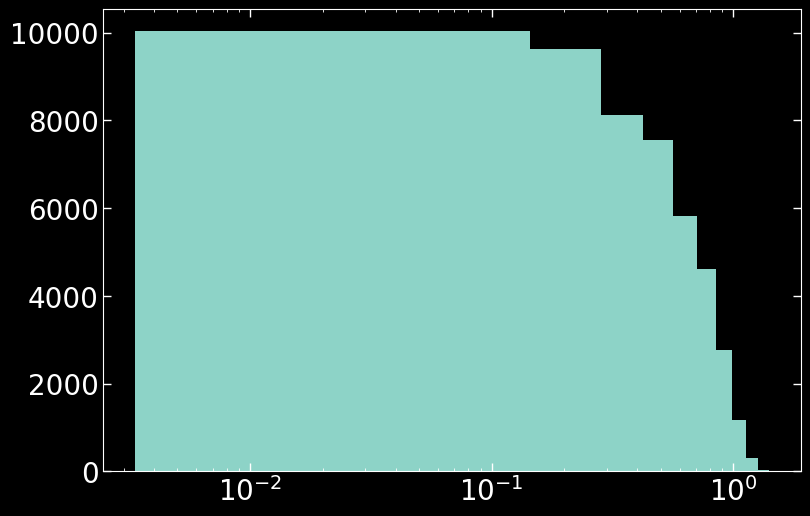

In [21]:
plt.hist(r)
plt.xscale('log')

In [ ]:
# halo concentration is r200/r_s
r_s = 0.07706669220350332
c=rad/r_s
c


2.1708470315322805